In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [3]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [4]:
y_train = y_train.reshape(-1,)

In [5]:
# Reshape converting 2D to 1D
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

In [6]:
# This code normalazation
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
from tensorflow.keras import layers, models

# Assuming you meant to use `models` instead of `keras.models` and similarly for `layers`.
lenet = models.Sequential([
    layers.Conv2D(6, kernel_size=5, strides=1, activation='relu', input_shape=(32,32,3), padding='same'), # C1
    layers.AveragePooling2D(pool_size=(2, 2)), # S2, fixed by adding pool_size
    layers.Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='valid'), # C3
    layers.AveragePooling2D(pool_size=(2, 2)), # S4, fixed by adding pool_size
    layers.Conv2D(120, kernel_size=5, strides=1, activation='relu', padding='valid'), # C5
    layers.Flatten(), # Flatten
    layers.Dense(84, activation='relu'), # F6
    layers.Dense(10, activation='softmax') # Output layer
])


In [9]:
lenet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 16, 16, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 6, 6, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 2, 2, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 84)                  │          40,404 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,246 (360.34 KB)

 Trainable params: 92,246 (360.34 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
lenet.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [11]:
hist = lenet.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test),verbose=1)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.3333 - loss: 1.8194 - val_accuracy: 0.4920 - val_loss: 1.4161
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5176 - loss: 1.3443 - val_accuracy: 0.5253 - val_loss: 1.3142
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5764 - loss: 1.1928 - val_accuracy: 0.5908 - val_loss: 1.1543
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6185 - loss: 1.0803 - val_accuracy: 0.6124 - val_loss: 1.0892
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6419 - loss: 1.0157 - val_accuracy: 0.6169 - val_loss: 1.0822
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6710 - loss: 0.9396 - val_accuracy: 0.6334 - val_loss: 1.0347
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6829 - loss: 0.8938 - val_accuracy: 0.6504 - val_loss: 1.0058
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7005 -

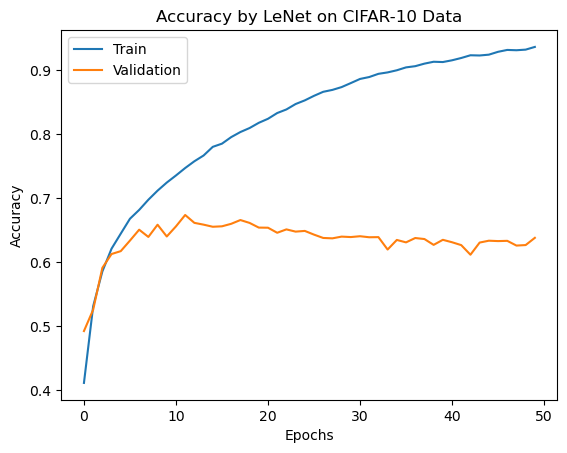

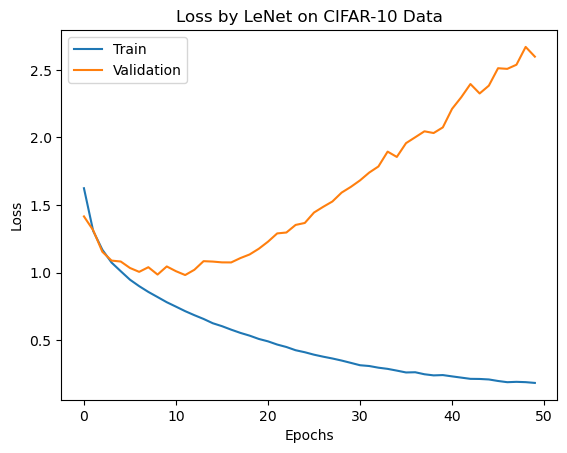

In [12]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Accuracy by LeNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss by LeNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_predictions= lenet.predict(x_test)
y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)

confusion_matrix(y_test, y_predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[668,  32,  69,  25,  48,  14,  18,  17,  82,  27],
       [ 18, 774,   7,  13,  10,  11,  15,   6,  58,  88],
       [ 71,   6, 537,  94, 115,  46,  64,  37,  20,  10],
       [ 24,  17,  81, 434, 103, 169,  75,  54,  18,  25],
       [ 20,   8,  82,  65, 616,  59,  61,  74,  10,   5],
       [ 18,  11,  59, 200,  69, 498,  46,  65,  17,  17],
       [ 13,  15,  51,  71,  50,  32, 729,  18,   9,  12],
       [ 12,   8,  44,  50,  92,  63,  16, 682,   7,  26],
       [ 70,  46,  15,  30,  14,  12,   8,   7, 767,  31],
       [ 45, 135,  13,  23,  23,  21,  14,  18,  36, 672]], dtype=int64)

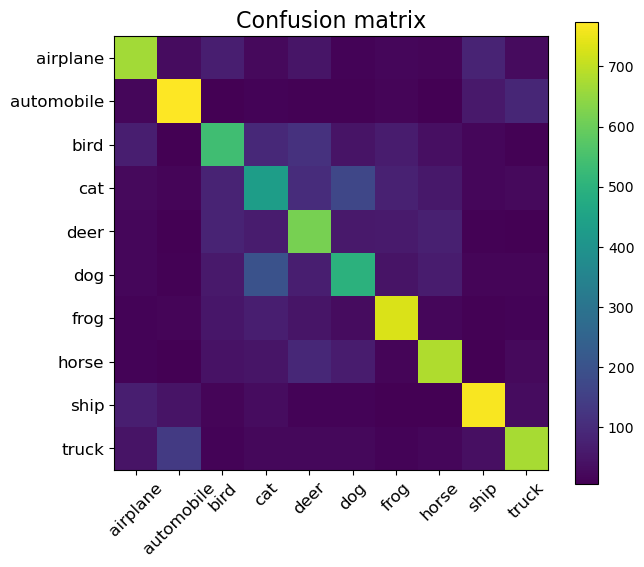

In [14]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [15]:
print("Test accuracy:", accuracy_score(y_test, y_predictions))

Test accuracy: 0.6377


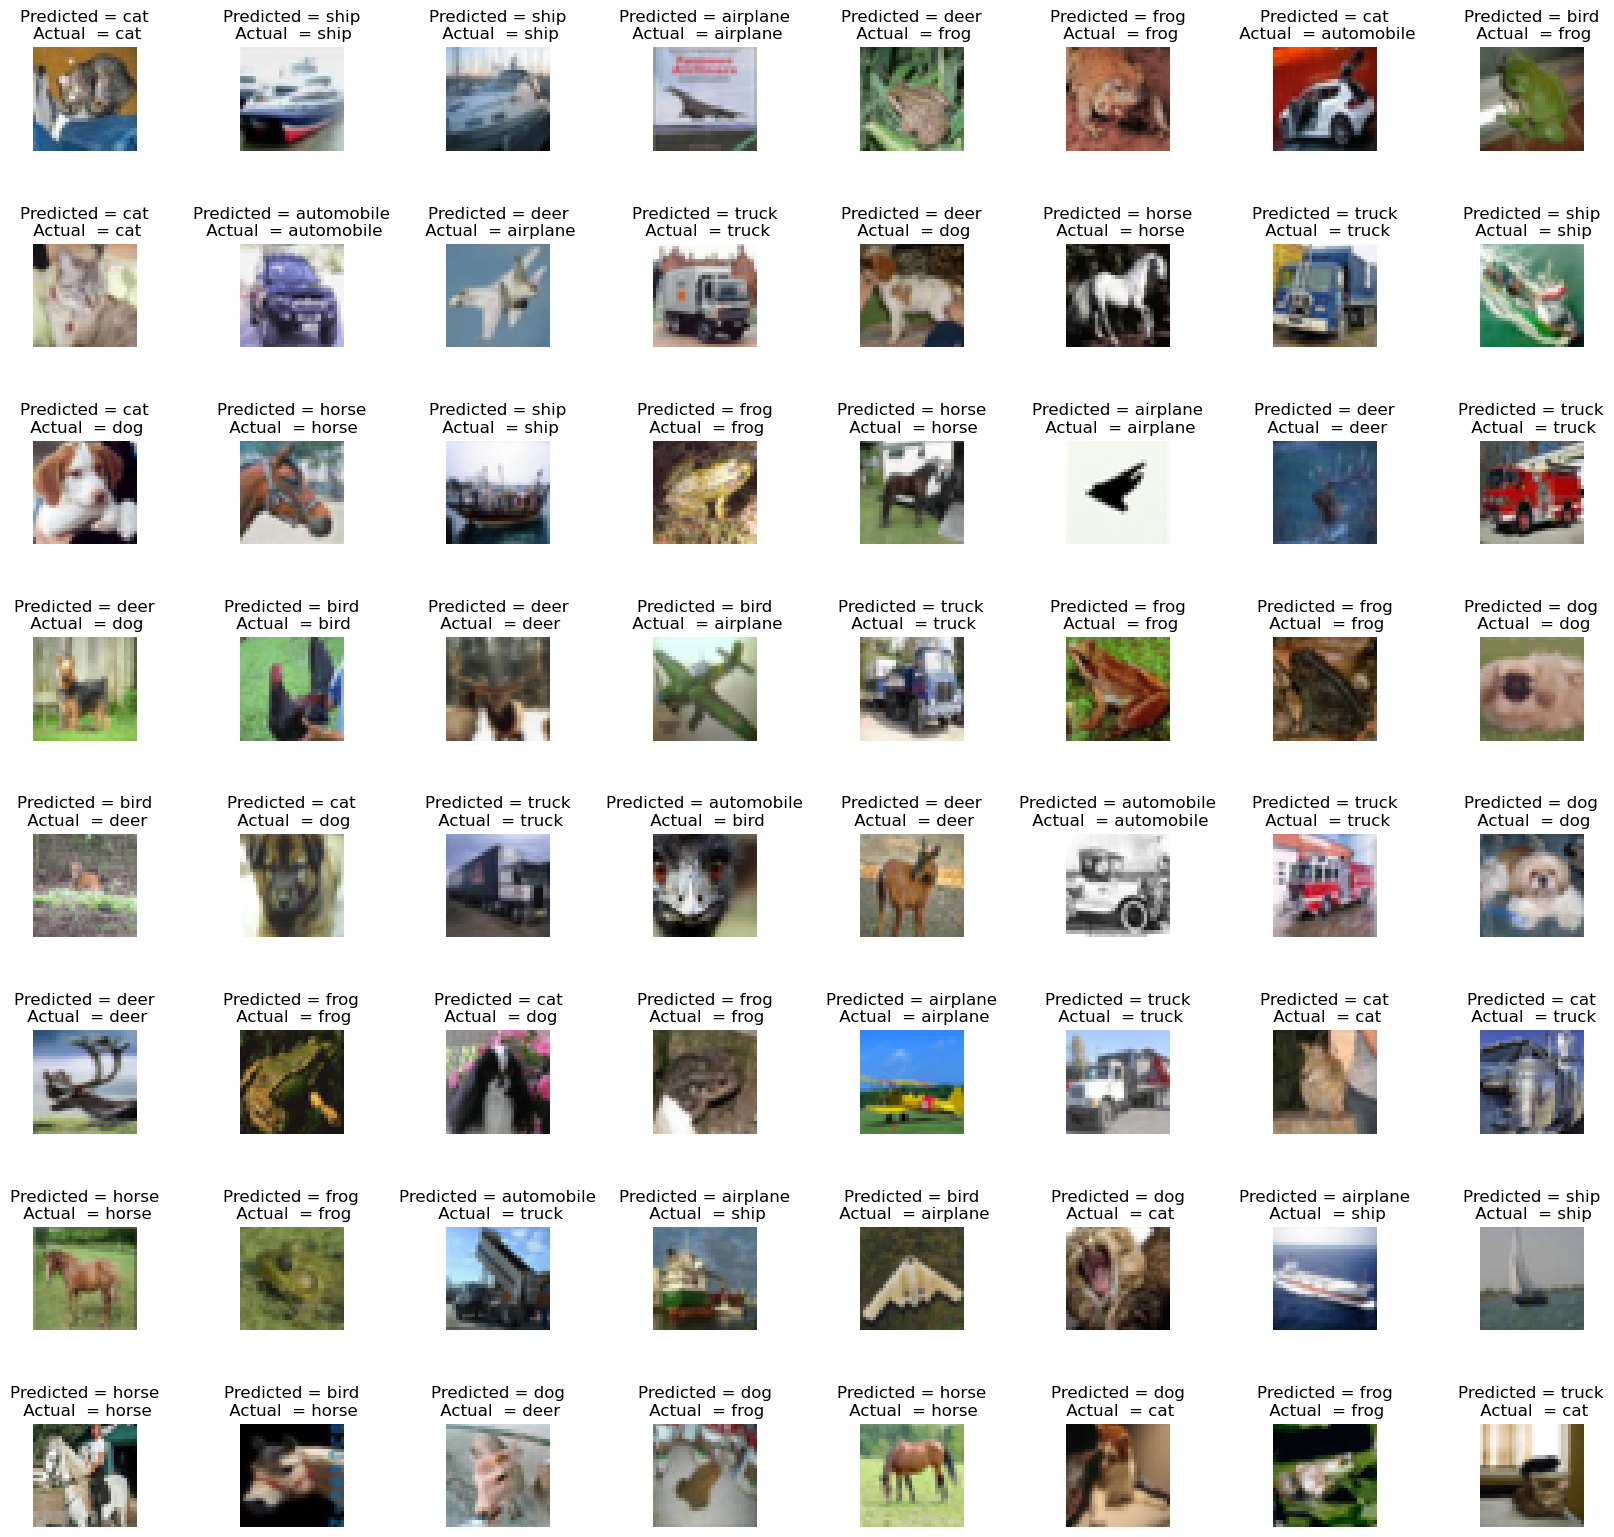

In [16]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)